In [1]:
# Install RDKit.
# %%capture
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 9.8 MB/s eta 0:00:00


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem.rdmolops import PatternFingerprint
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect
pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('/content/nitrogencompounds.xlsx')

In [4]:
df

,Name,Smiles
0,benzonitrile,N#CC1=CC=CC=C1
1,nitromethane,C[N+]([O-])=O
2,nitroethane,CC[N+]([O-])=O
3,nitrocyclohexane,O=[N+](C1CCCCC1)[O-]
4,nitrobenzene,O=[N+](C1=CC=CC=C1)[O-]
5,tert-butylamine,NC(C)(C)C
6,"1,2-diaminoethane",NCCN
7,diethylamine,CCNCC
8,triethylamine,CCN(CC)CC
9,tris(n-butyl)amine,CCCCN(CCCC)CCCC


# **Generating molecular objects from SMILES**

In [5]:
# Creating molecular object from Smiles

PandasTools.AddMoleculeColumnToFrame(df,'Smiles','mol')

,Name,Smiles,mol
0,benzonitrile,N#CC1=CC=CC=C1,
1,nitromethane,C[N+]([O-])=O,
2,nitroethane,CC[N+]([O-])=O,
3,nitrocyclohexane,O=[N+](C1CCCCC1)[O-],
4,nitrobenzene,O=[N+](C1=CC=CC=C1)[O-],
5,tert-butylamine,NC(C)(C)C,
6,"1,2-diaminoethane",NCCN,
7,diethylamine,CCNCC,
8,triethylamine,CCN(CC)CC,
9,tris(n-butyl)amine,CCCCN(CCCC)CCCC,

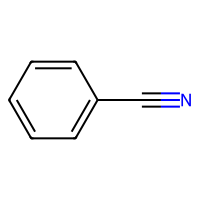
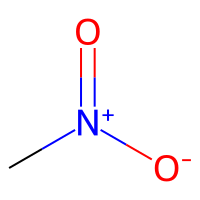
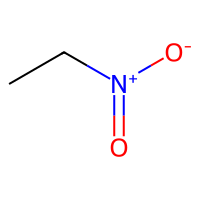
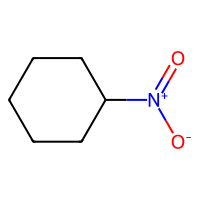
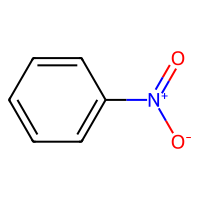
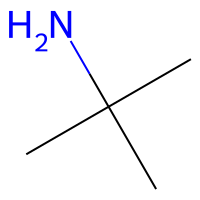
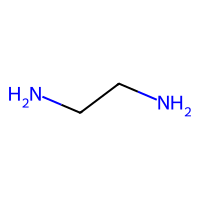
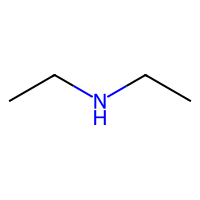
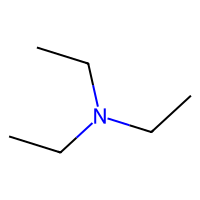
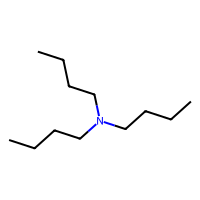
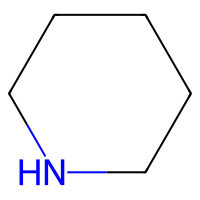
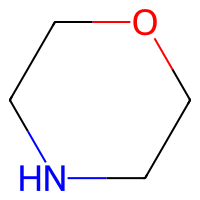

In [6]:
df

# **Atom Pair Fingerprint**

In [7]:
# create an empty list
df_apf = []

# run a for loop to iterate through each molecule
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=4096)

for mol in df['mol']:
  apf_bitvector = apgen.GetFingerprint(mol)


# convert the RDKit explicit vectors into numpy arrays
  arr = np.array(apf_bitvector)
  df_apf.append(arr)

APF = pd.concat([df, pd.DataFrame(df_apf)], axis=1)

In [8]:
APF.head()

,Name,Smiles,mol,0,1,2,3,4,5,6,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,benzonitrile,N#CC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7d9b8c1d8740>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,nitromethane,C[N+]([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7d9b8c1d87b0>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,nitroethane,CC[N+]([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7d9b8c1d8820>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,nitrocyclohexane,O=[N+](C1CCCCC1)[O-],<rdkit.Chem.rdchem.Mol object at 0x7d9b8c1d86d0>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,nitrobenzene,O=[N+](C1=CC=CC=C1)[O-],<rdkit.Chem.rdchem.Mol object at 0x7d9b8c1d8890>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
APF.drop('mol', axis=1).to_excel('apf.xlsx', index=None)
APF.drop('mol', axis=1).to_csv('apf.csv', index=None)

# **Topological Torsion Fingerprint**


In [10]:
df_ttf = []
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)
for mol in df['mol']:
  ttf_bitvector = ttgen.GetFingerprint(mol)

  # convert the RDKit explicit vectors into numpy arrays
  arr = np.array(ttf_bitvector)
  df_ttf.append(arr)

TTF = pd.concat([df, pd.DataFrame(df_ttf)], axis=1)

In [11]:
TTF.head()

,Name,Smiles,mol,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,benzonitrile,N#CC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7d9b8c1d8740>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,nitromethane,C[N+]([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7d9b8c1d87b0>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,nitroethane,CC[N+]([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7d9b8c1d8820>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,nitrocyclohexane,O=[N+](C1CCCCC1)[O-],<rdkit.Chem.rdchem.Mol object at 0x7d9b8c1d86d0>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,nitrobenzene,O=[N+](C1=CC=CC=C1)[O-],<rdkit.Chem.rdchem.Mol object at 0x7d9b8c1d8890>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
TTF.drop('mol', axis=1).to_excel('ttf.xlsx', index=None)
TTF.drop('mol', axis=1).to_csv('ttf.csv', index=None)